In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
from keras import backend as K
import keras.layers as layers
from keras.models import Model
from keras import Sequential
from keras.layers import Lambda, Dense, Flatten
from sklearn.metrics import roc_curve, roc_auc_score
from keras.losses import binary_crossentropy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bpnachma

In [3]:
G4_occupancy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_occupancy.npy")
GAN_occupancy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_occupancy.npy")

G4_Center = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_CenterOfGravity.npy")
GAN_Center = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_CenterOfGravity.npy")

G4_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_energy.npy")
GAN_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_energy.npy")

G4_longitud_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_longitud_energy.npy")
GAN_longitud_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_longitud_energy.npy")

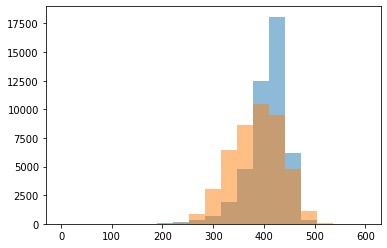

In [4]:
_,_,_=plt.hist(G4_occupancy,alpha=0.5,bins=np.linspace(0,600,20))
_,_,_=plt.hist(GAN_occupancy,alpha=0.5,bins=np.linspace(0,600,20))

In [5]:
X = np.concatenate([G4_occupancy/1000.,GAN_occupancy/1000.])
Y = np.concatenate([np.ones(len(G4_occupancy)),np.zeros(len(GAN_occupancy))])
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.5)

In [6]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape =(1,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_model = model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 45000 samples
Epoch 1/20
45000/45000 [==============================] - 5s 104us/step - loss: 0.6809 - acc: 0.5858 - val_loss: 0.6622 - val_acc: 0.6266
Epoch 2/20
45000/45000 [==============================] - 2s 47us/step - loss: 0.6597 - acc: 0.6225 - val_loss: 0.6559 - val_acc: 0.6224
Epoch 3/20
45000/45000 [==============================] - 2s 49us/step - loss: 0.6555 - acc: 0.6255 - val_loss: 0.6610 - val_acc: 0.6077
Epoch 4/20
45000/45000 [==============================] - 2s 48us/step - loss: 0.6539 - acc: 0.6268 - val_loss: 0.6527 - val_acc: 0.6239
Epoch 5/20
45000/45000 [==============================] - 2s 50us/step - loss: 0.6519 - acc: 0.6245 - val_loss: 0.6595 - val_acc: 0.6102
Epoch 6/20
45000/45000 [==============================] - 2s 49us/step - loss: 0.6511 - acc: 0.6247 - val_loss: 0.6488 - val_acc: 0.6269
Epoch 7/20
45000/45000 [==============================] - 2s 47us/step - loss: 0.6493 - acc: 0.6254 - val_loss: 0.6474 - val_ac

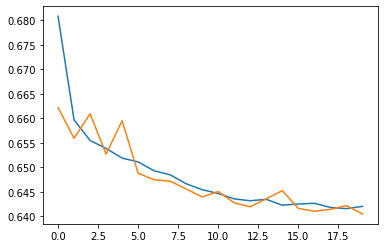

In [7]:
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])

In [8]:
weights_hold = model.predict(X_val)
weights = weights_hold/(1.-weights_hold)

(array([  96., 6673., 2342., 1896., 1813., 1510., 1625., 1398., 1827.,
        3373.]),
 array([0.03557161, 0.22497931, 0.41438702, 0.6037947 , 0.7932024 ,
        0.9826101 , 1.1720178 , 1.3614255 , 1.5508332 , 1.7402409 ,
        1.9296486 ], dtype=float32),
 <a list of 10 Patch objects>)

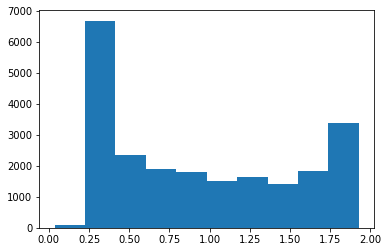

In [9]:
plt.hist(weights[Y_val==0])

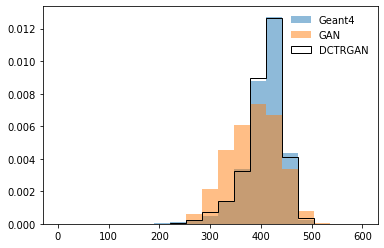

In [10]:
_,_,_=plt.hist(G4_occupancy,alpha=0.5,bins=np.linspace(0,600,20),label="Geant4",density=True)
_,_,_=plt.hist(GAN_occupancy,alpha=0.5,bins=np.linspace(0,600,20),label="GAN",density=True)
_,_,_=plt.hist(X_val[Y_val==0]*1000,weights=weights[Y_val==0],color="black",bins=np.linspace(0,600,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)

In [11]:
#Now, let's do higher dimensional.

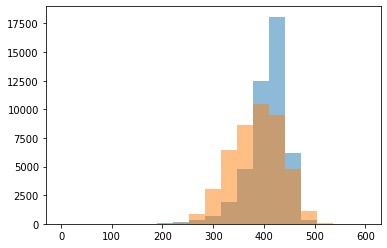

In [12]:
_,_,_=plt.hist(G4_occupancy,alpha=0.5,bins=np.linspace(0,600,20))
_,_,_=plt.hist(GAN_occupancy,alpha=0.5,bins=np.linspace(0,600,20))

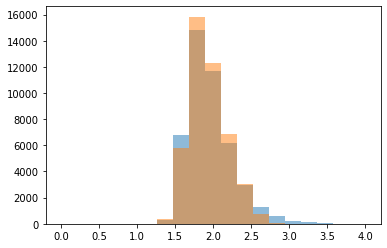

In [13]:
_,_,_=plt.hist(G4_Center,alpha=0.5,bins=np.linspace(0,4,20))
_,_,_=plt.hist(GAN_Center,alpha=0.5,bins=np.linspace(0,4,20))

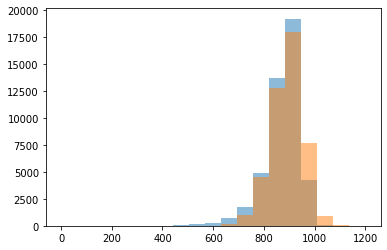

In [14]:
_,_,_=plt.hist(G4_energy,alpha=0.5,bins=np.linspace(0,1200,20))
_,_,_=plt.hist(GAN_energy,alpha=0.5,bins=np.linspace(0,1200,20))

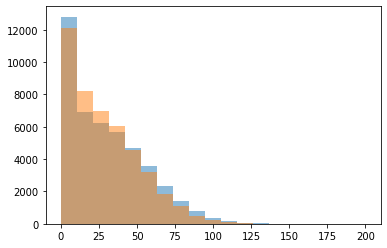

In [15]:
_,_,_=plt.hist(G4_longitud_energy[:,0],alpha=0.5,bins=np.linspace(0,200,20))
_,_,_=plt.hist(GAN_longitud_energy[:,0],alpha=0.5,bins=np.linspace(0,200,20))

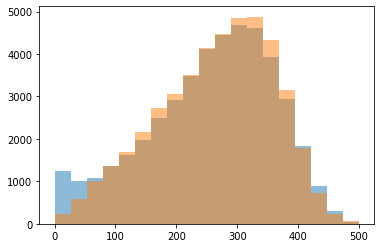

In [16]:
_,_,_=plt.hist(G4_longitud_energy[:,1],alpha=0.5,bins=np.linspace(0,500,20))
_,_,_=plt.hist(GAN_longitud_energy[:,1],alpha=0.5,bins=np.linspace(0,500,20))

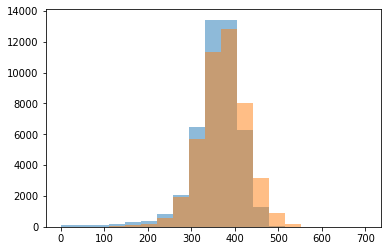

In [17]:
_,_,_=plt.hist(G4_longitud_energy[:,2],alpha=0.5,bins=np.linspace(0,700,20))
_,_,_=plt.hist(GAN_longitud_energy[:,2],alpha=0.5,bins=np.linspace(0,700,20))

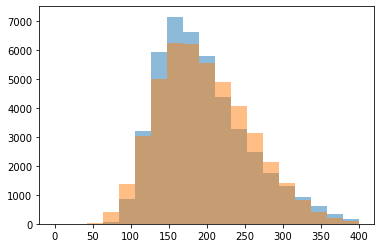

In [18]:
_,_,_=plt.hist(G4_longitud_energy[:,3],alpha=0.5,bins=np.linspace(0,400,20))
_,_,_=plt.hist(GAN_longitud_energy[:,3],alpha=0.5,bins=np.linspace(0,400,20))

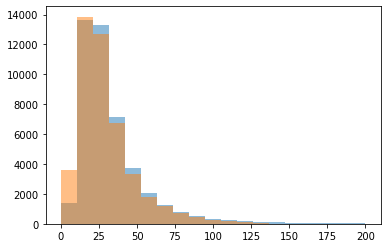

In [19]:
_,_,_=plt.hist(G4_longitud_energy[:,4],alpha=0.5,bins=np.linspace(0,200,20))
_,_,_=plt.hist(GAN_longitud_energy[:,4],alpha=0.5,bins=np.linspace(0,200,20))

In [20]:
X_G4 = np.c_[G4_occupancy/1000.,G4_Center,G4_energy/1000.,G4_longitud_energy[:,0]/1000.,G4_longitud_energy[:,1]/1000.,G4_longitud_energy[:,2]/1000.,G4_longitud_energy[:,3]/1000.,G4_longitud_energy[:,4]/1000.]
X_GAN = np.c_[GAN_occupancy/1000.,GAN_Center,GAN_energy/1000.,GAN_longitud_energy[:,0]/1000.,GAN_longitud_energy[:,1]/1000.,GAN_longitud_energy[:,2]/1000.,GAN_longitud_energy[:,3]/1000.,GAN_longitud_energy[:,4]/1000.]

In [21]:
X2 = np.concatenate([X_G4,X_GAN])
Y2 = np.concatenate([np.ones(len(X_G4)),np.zeros(len(X_GAN))])
X2_train, X2_val, Y2_train, Y2_val = train_test_split(X2, Y2, test_size=0.5)

In [22]:
model2 = Sequential()
model2.add(Dense(128, activation='relu',input_shape =(8,))) 
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_model2 = model2.fit(X2_train, Y2_train, epochs=30, batch_size=128,validation_data=(X2_val, Y2_val))

Train on 45000 samples, validate on 45000 samples
Epoch 1/30
45000/45000 [==============================] - 2s 55us/step - loss: 0.6637 - acc: 0.5983 - val_loss: 0.6218 - val_acc: 0.6517
Epoch 2/30
45000/45000 [==============================] - 2s 49us/step - loss: 0.5948 - acc: 0.6805 - val_loss: 0.5671 - val_acc: 0.7177
Epoch 3/30
45000/45000 [==============================] - 2s 49us/step - loss: 0.5594 - acc: 0.7074 - val_loss: 0.5418 - val_acc: 0.7209
Epoch 4/30
45000/45000 [==============================] - 2s 48us/step - loss: 0.5446 - acc: 0.7156 - val_loss: 0.5330 - val_acc: 0.7244
Epoch 5/30
45000/45000 [==============================] - 2s 49us/step - loss: 0.5363 - acc: 0.7194 - val_loss: 0.5318 - val_acc: 0.7224
Epoch 6/30
45000/45000 [==============================] - 2s 49us/step - loss: 0.5290 - acc: 0.7239 - val_loss: 0.5247 - val_acc: 0.7333
Epoch 7/30
45000/45000 [==============================] - 2s 50us/step - loss: 0.5216 - acc: 0.7302 - val_loss: 0.5106 - val_acc

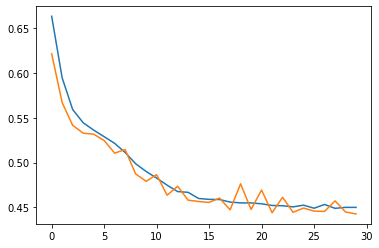

In [23]:
plt.plot(hist_model2.history['loss'])
plt.plot(hist_model2.history['val_loss'])

In [24]:
weights2_hold = model2.predict(X2_val)
weights2 = weights2_hold/(1.-weights2_hold)

(array([9008., 1597., 1044.,  851.,  757.,  651.,  553.,  535.,  438.,
         395.,  370.,  400.,  344.,  337.,  323.,  273.,  253.,  228.,
         239.]),
 array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
 <a list of 19 Patch objects>)

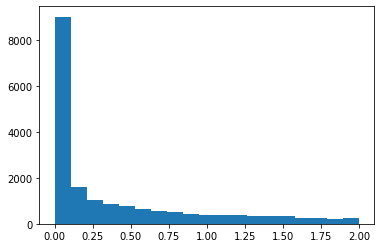

In [25]:
plt.hist(weights2[Y2_val==0],bins=np.linspace(0,2,20))

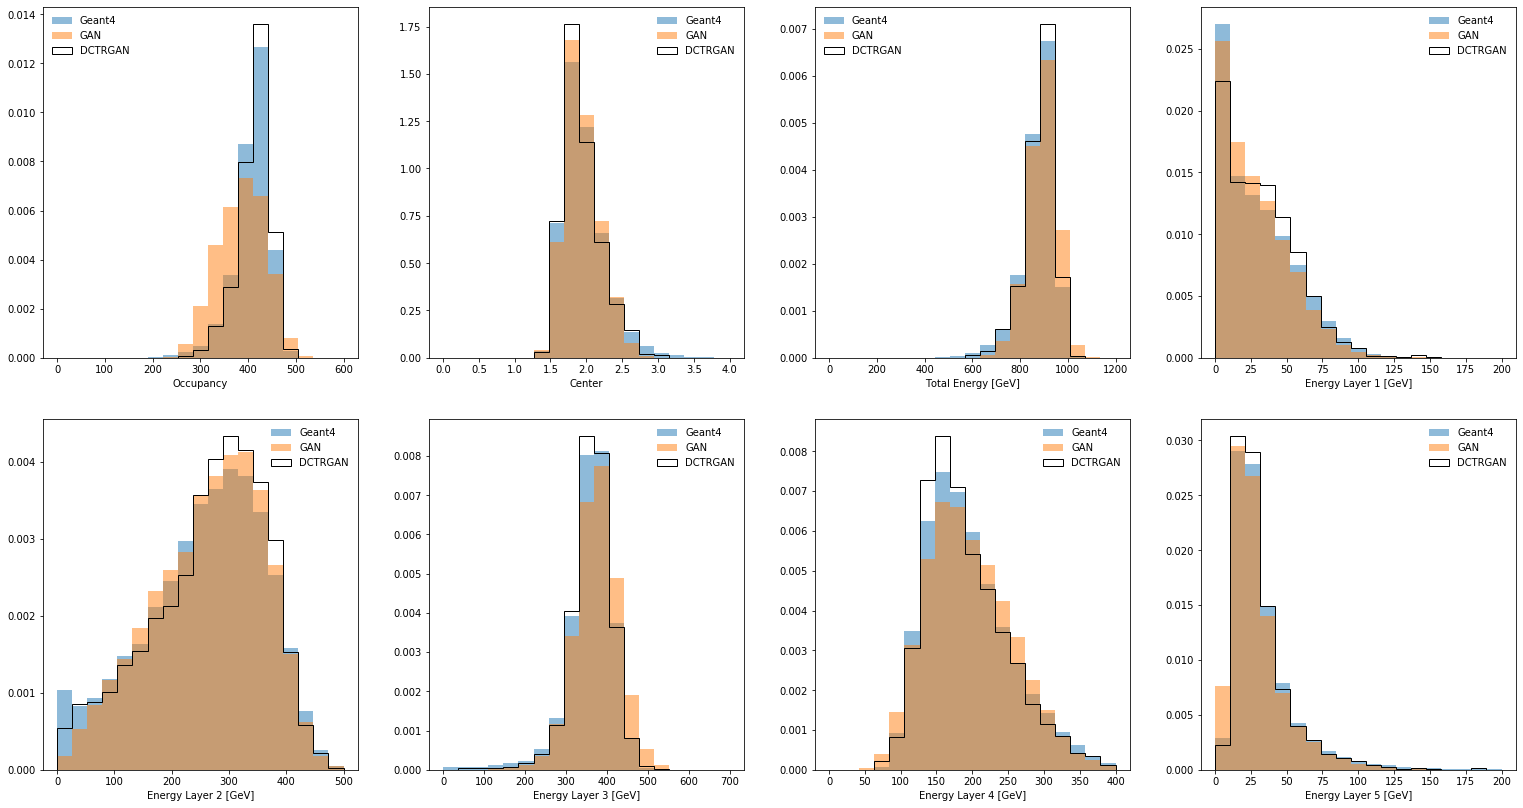

In [26]:
figure, axes = plt.subplots(figsize=(22, 12),nrows=2, ncols=4)
figure.tight_layout(pad=4.0)

ax0 = plt.subplot(241)
_,_,_=plt.hist(X2_val[Y2_val==1][:,0]*1000,alpha=0.5,bins=np.linspace(0,600,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,0]*1000,alpha=0.5,bins=np.linspace(0,600,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,0]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,600,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Occupancy")

ax0 = plt.subplot(242)
_,_,_=plt.hist(X2_val[Y2_val==1][:,1],alpha=0.5,bins=np.linspace(0,4,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,1],alpha=0.5,bins=np.linspace(0,4,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,1],weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,4,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Center")

ax0 = plt.subplot(243)
_,_,_=plt.hist(X2_val[Y2_val==1][:,2]*1000,alpha=0.5,bins=np.linspace(0,1200,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,2]*1000,alpha=0.5,bins=np.linspace(0,1200,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,2]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,1200,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Total Energy [GeV]")

ax0 = plt.subplot(244)
_,_,_=plt.hist(X2_val[Y2_val==1][:,3]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,3]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,3]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,200,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 1 [GeV]")

ax0 = plt.subplot(245)
_,_,_=plt.hist(X2_val[Y2_val==1][:,4]*1000,alpha=0.5,bins=np.linspace(0,500,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,4]*1000,alpha=0.5,bins=np.linspace(0,500,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,4]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,500,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 2 [GeV]")

ax0 = plt.subplot(246)
_,_,_=plt.hist(X2_val[Y2_val==1][:,5]*1000,alpha=0.5,bins=np.linspace(0,700,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,5]*1000,alpha=0.5,bins=np.linspace(0,700,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,5]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,700,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 3 [GeV]")

ax0 = plt.subplot(247)
_,_,_=plt.hist(X2_val[Y2_val==1][:,6]*1000,alpha=0.5,bins=np.linspace(0,400,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,6]*1000,alpha=0.5,bins=np.linspace(0,400,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,6]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,400,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 4 [GeV]")

ax0 = plt.subplot(248)
_,_,_=plt.hist(X2_val[Y2_val==1][:,7]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,7]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,7]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,200,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 5 [GeV]")

plt.savefig("TestHighLevel.pdf",bbox_inches='tight')

In [86]:
def makeplotwithratio(plotname,whichone=0,mybins=np.linspace(250,500,20),multiplier=1000,axisname=r"Number of Activated Cells"):

    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax0.minorticks_on()

    plt.xlabel(r"",fontsize=20)
    plt.ylabel(r"Normalized to unity",fontsize=20)
    plt.locator_params(axis='y', nbins=6)

    if (whichone < 8):
        _,_,_=plt.hist(X2_val[Y2_val==1][:,whichone]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,whichone]*multiplier,alpha=0.5,bins=mybins,label="GAN",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,whichone]*multiplier,weights=weights2[Y2_val==0],color="black",bins=mybins,label="DCTRGAN",density=True,histtype="step",linewidth=3)
    elif (whichone==8):
        _,_,_=plt.hist(X2_val[Y2_val==1][:,5]*multiplier-X2_val[Y2_val==1][:,6]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,alpha=0.5,bins=mybins,label="GAN",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,weights=weights2[Y2_val==0],color="black",bins=mybins,label="DCTRGAN",density=True,histtype="step",linewidth=3) 
        pass
    plt.legend(frameon=False,fontsize=20)
    plt.xticks(fontsize=0)

    if (whichone < 8):
        myn2,bmjj=np.histogram(X2_val[Y2_val==1][:,whichone]*multiplier,bins=mybins)
        myn,_=np.histogram(X2_val[Y2_val==0][:,whichone]*multiplier,bins=mybins)
        myn3,_=np.histogram(X2_val[Y2_val==0][:,whichone]*multiplier,weights=weights2[Y2_val==0][:,0],bins=mybins)
    elif (whichone==8):
        myn2,bmjj=np.histogram(X2_val[Y2_val==1][:,5]*multiplier-X2_val[Y2_val==1][:,6]*multiplier,bins=mybins)
        myn,_=np.histogram(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,bins=mybins)
        myn3,_=np.histogram(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,weights=weights2[Y2_val==0][:,0],bins=mybins)
        pass
    
    #plt.text(250,0.008,"50 GeV photons",fontsize=20)

    ax1 = plt.subplot(gs[1])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(direction="in",which="both")
    ax1.minorticks_on()
    plt.locator_params(axis='x', nbins=6)
    plt.xlabel(axisname,fontsize=20)
    plt.ylabel("Ratio to G4",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.axhline(y=1,linewidth=2, color='gray')   
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),myn3/myn2,yerr=(myn3+myn2)**0.5/myn2,color='black',fmt='s')
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),myn/myn2,yerr=(myn+myn2)**0.5/myn2,color='#ff7f0e',fmt='o',alpha=0.5)
    plt.ylim(0.,2.5)

    plt.savefig(plotname,bbox_inches='tight')

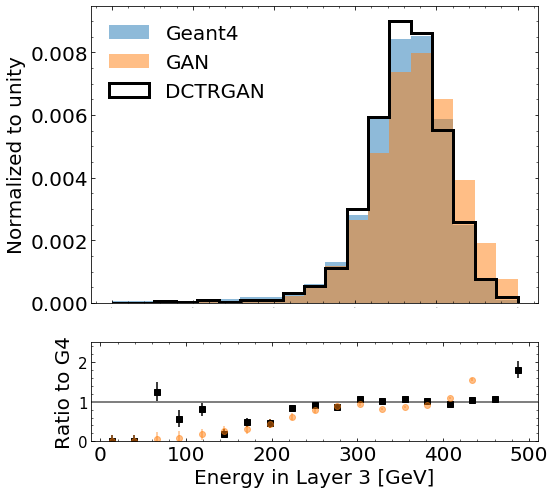

In [98]:
#makeplotwithratio("Occupancy.pdf",whichone=0)
#makeplotwithratio("Center.pdf",whichone=1,mybins=np.linspace(1.,3.5,20),multiplier=1,axisname="Longitudinal Centroid")
#makeplotwithratio("TotalEnergy.pdf",mybins=np.linspace(550,1050,20),whichone=2,axisname="Total Energy [GeV]")
#makeplotwithratio("EnergyLayer1.pdf",mybins=np.linspace(0,120,20),whichone=3,axisname="Energy in Layer 1 [GeV]")
#makeplotwithratio("EnergyLayer2.pdf",mybins=np.linspace(0,500,20),whichone=4,axisname="Energy in Layer 2 [GeV]")
makeplotwithratio("EnergyLayer3.pdf",mybins=np.linspace(20,600,20),whichone=5,axisname="Energy in Layer 3 [GeV]")